In [1]:
!pip install torchsummary


In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader ,random_split , Subset
import torchvision
from torchvision import datasets
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.metrics import accuracy_score,classification_report
import torch
import torch.nn as nn
import torchvision.models as models
from tqdm import tqdm_notebook as tqdm
import time
import shutil
import os
import re 
import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Selecting only letters from dataset 

In [3]:
# Replace 'path_to_directory' with the path of your directory
original_directory = '/kaggle/input/arabic-letters-numbers-ocr/Dataset'
filtered_directory = '/kaggle/working/filtered_dataset'  # Change this to your desired location

# Get all directories in the specified path
folders = [folder for folder in os.listdir(original_directory) if os.path.isdir(os.path.join(original_directory, folder))]

# Filter folders to only contain letters (no numbers or special characters)
filtered_folders = [folder for folder in folders if re.match('^[\u0621-\u064A]+$', folder)]

# Print folder names containing only letters
for folder_name in filtered_folders:
    print(folder_name)

# Create the new directory to store the filtered folders
if not os.path.exists(filtered_directory):
    os.makedirs(filtered_directory)

# Move directories that are in the filtered_folders list to the new location
for folder in folders:
    if folder in filtered_folders:
        source_path = os.path.join(original_directory, folder)
        destination_path = os.path.join(filtered_directory, folder)
        # Use try-except to handle potential errors during folder moving
        try:
            shutil.move(source_path, destination_path)  # Move the directory
            print(f"Moved folder {folder} to {filtered_directory}")
        except Exception as e:
            print(f"Error moving {folder}: {e}")

# Now, the directories containing only letters are moved to the filtered_directory

س
و
ظ
ط
غ
ف
ا
ض
ث
ذ
ق
ش
ص
ب
ت
لا
ي
ج
ح
خ
ز
ه
د
ك
م
ر
ل
ن
ع
Error moving س: [Errno 30] Read-only file system: '2664.png'
Error moving و: [Errno 30] Read-only file system: '2664.png'
Error moving ظ: [Errno 30] Read-only file system: '2664.png'
Error moving ط: [Errno 30] Read-only file system: '2664.png'
Error moving غ: [Errno 30] Read-only file system: '2664.png'
Error moving ف: [Errno 30] Read-only file system: '2664.png'
Error moving ا: [Errno 30] Read-only file system: '2664.png'
Error moving ض: [Errno 30] Read-only file system: '2664.png'
Error moving ث: [Errno 30] Read-only file system: '2664.png'
Error moving ذ: [Errno 30] Read-only file system: '2664.png'
Error moving ق: [Errno 30] Read-only file system: '2664.png'
Error moving ش: [Errno 30] Read-only file system: '2664.png'
Error moving ص: [Errno 30] Read-only file system: '2664.png'
Error moving ب: [Errno 30] Read-only file system: '2664.png'
Error moving ت: [Errno 30] Read-only file system: '2664.png'
Error moving لا: [Errno 30

In [4]:
import os

# Define the directory path
directory_path = '/kaggle/working/filtered_dataset'

# Initialize a count variable for folders
folder_count = 0

# Iterate through all items in the specified directory
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isdir(item_path):
        folder_count += 1

print(f"Number of folders in the directory: {folder_count}")

Number of folders in the directory: 29


Displaying classes balance (distribution of classes)

In [5]:

# Function to count images in a folder
def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
    image_count = 0
    
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            # Check if the file has an image extension
            if any(item_path.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    
    return image_count

# Iterate through each folder in the directory
for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)
    if os.path.isdir(folder_path):
        # Count images in the current folder
        image_count = count_images_in_folder(folder_path)
        print(f"Folder '{folder_name}' has {image_count} image(s)")

Folder 'ج' has 2481 image(s)
Folder 'ر' has 2481 image(s)
Folder 'ب' has 2481 image(s)
Folder 'ق' has 2481 image(s)
Folder 'ذ' has 2481 image(s)
Folder 'ف' has 2481 image(s)
Folder 'خ' has 2481 image(s)
Folder 'و' has 2481 image(s)
Folder 'م' has 2481 image(s)
Folder 'ز' has 2481 image(s)
Folder 'س' has 2481 image(s)
Folder 'ا' has 2481 image(s)
Folder 'ع' has 2481 image(s)
Folder 'لا' has 2481 image(s)
Folder 'ح' has 2481 image(s)
Folder 'غ' has 2481 image(s)
Folder 'ش' has 2481 image(s)
Folder 'د' has 2481 image(s)
Folder 'ك' has 2481 image(s)
Folder 'ه' has 2481 image(s)
Folder 'ت' has 2481 image(s)
Folder 'ث' has 2481 image(s)
Folder 'ن' has 2481 image(s)
Folder 'ل' has 2481 image(s)
Folder 'ض' has 2481 image(s)
Folder 'ط' has 2481 image(s)
Folder 'ظ' has 2481 image(s)
Folder 'ي' has 2481 image(s)
Folder 'ص' has 2481 image(s)


# Here The classes are balanced and it is worth to found something like that 

In [33]:
training_path = '/kaggle/working/filtered_dataset/'

IMAGE_SIZE=(128,128)
batch_size=64
learning_rate = 0.0008
epochs=50
num_classes=5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [7]:
def images_transforms(phase):
    if phase == 'training':
        data_transformation = transforms.Compose([
            transforms.Resize(IMAGE_SIZE),
            transforms.RandomEqualize(10),
            transforms.RandomRotation(degrees=(-25,20)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
    else:
        data_transformation=transforms.Compose([
            transforms.Resize(IMAGE_SIZE),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])


    return data_transformation

In [8]:
import random

In [9]:
# # Define your dataset
# dataset = datasets.ImageFolder(training_path, transform=images_transforms('training'))

# # Get the total length of the dataset
# total_len = len(dataset)

# # Calculate sizes for each split
# train_size = int(0.8 * total_len)
# val_test_size = (total_len - train_size) // 2

# # Create indices for the splits
# indices = list(range(total_len))

# # Shuffle the indices randomly
# import random
# random.shuffle(indices)

# # Split indices for train, val, and test sets
# train_indices = indices[:train_size]
# val_indices = indices[train_size: train_size + val_test_size]
# test_indices = indices[train_size + val_test_size:]

# # Create Subset datasets using the indices
# train_set = Subset(dataset, train_indices)
# val_set = Subset(dataset, val_indices)
# test_set = Subset(dataset, test_indices)

# # Optionally, create DataLoaders for each set
# train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
# test_loader = DataLoader(test_set, batch_size=32, shuffle=False)





from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Subset

# Define your training set transform (without normalization)
training_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
])

# Define transform only for normalization (no other augmentation)
normalize_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define your dataset
dataset = datasets.ImageFolder(training_path, transform=None)  # No transform initially

# Get the total length of the dataset
total_len = len(dataset)

# Calculate sizes for each split
train_size = int(0.8 * total_len)
val_test_size = (total_len - train_size) // 2

# Create indices for the splits
indices = list(range(total_len))
random.shuffle(indices)

# Split indices for train, val, and test sets
train_indices = indices[:train_size]
val_indices = indices[train_size: train_size + val_test_size]
test_indices = indices[train_size + val_test_size:]

# Create Subset datasets using the indices and apply transforms accordingly
train_set = Subset(dataset, train_indices)
val_set = Subset(dataset, val_indices)
test_set = Subset(dataset, test_indices)

# Apply specific transforms to validation and test sets
val_set.dataset.transform = normalize_transform
test_set.dataset.transform = normalize_transform

# Create DataLoaders for each set
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)


In [10]:
train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=True,num_workers=2)
test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=True,num_workers=2)
val_loader = DataLoader(val_set,batch_size=batch_size,shuffle=True,num_workers=2)

In [11]:
def imshow(img):
    plt.figure(figsize=(20, 20))
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

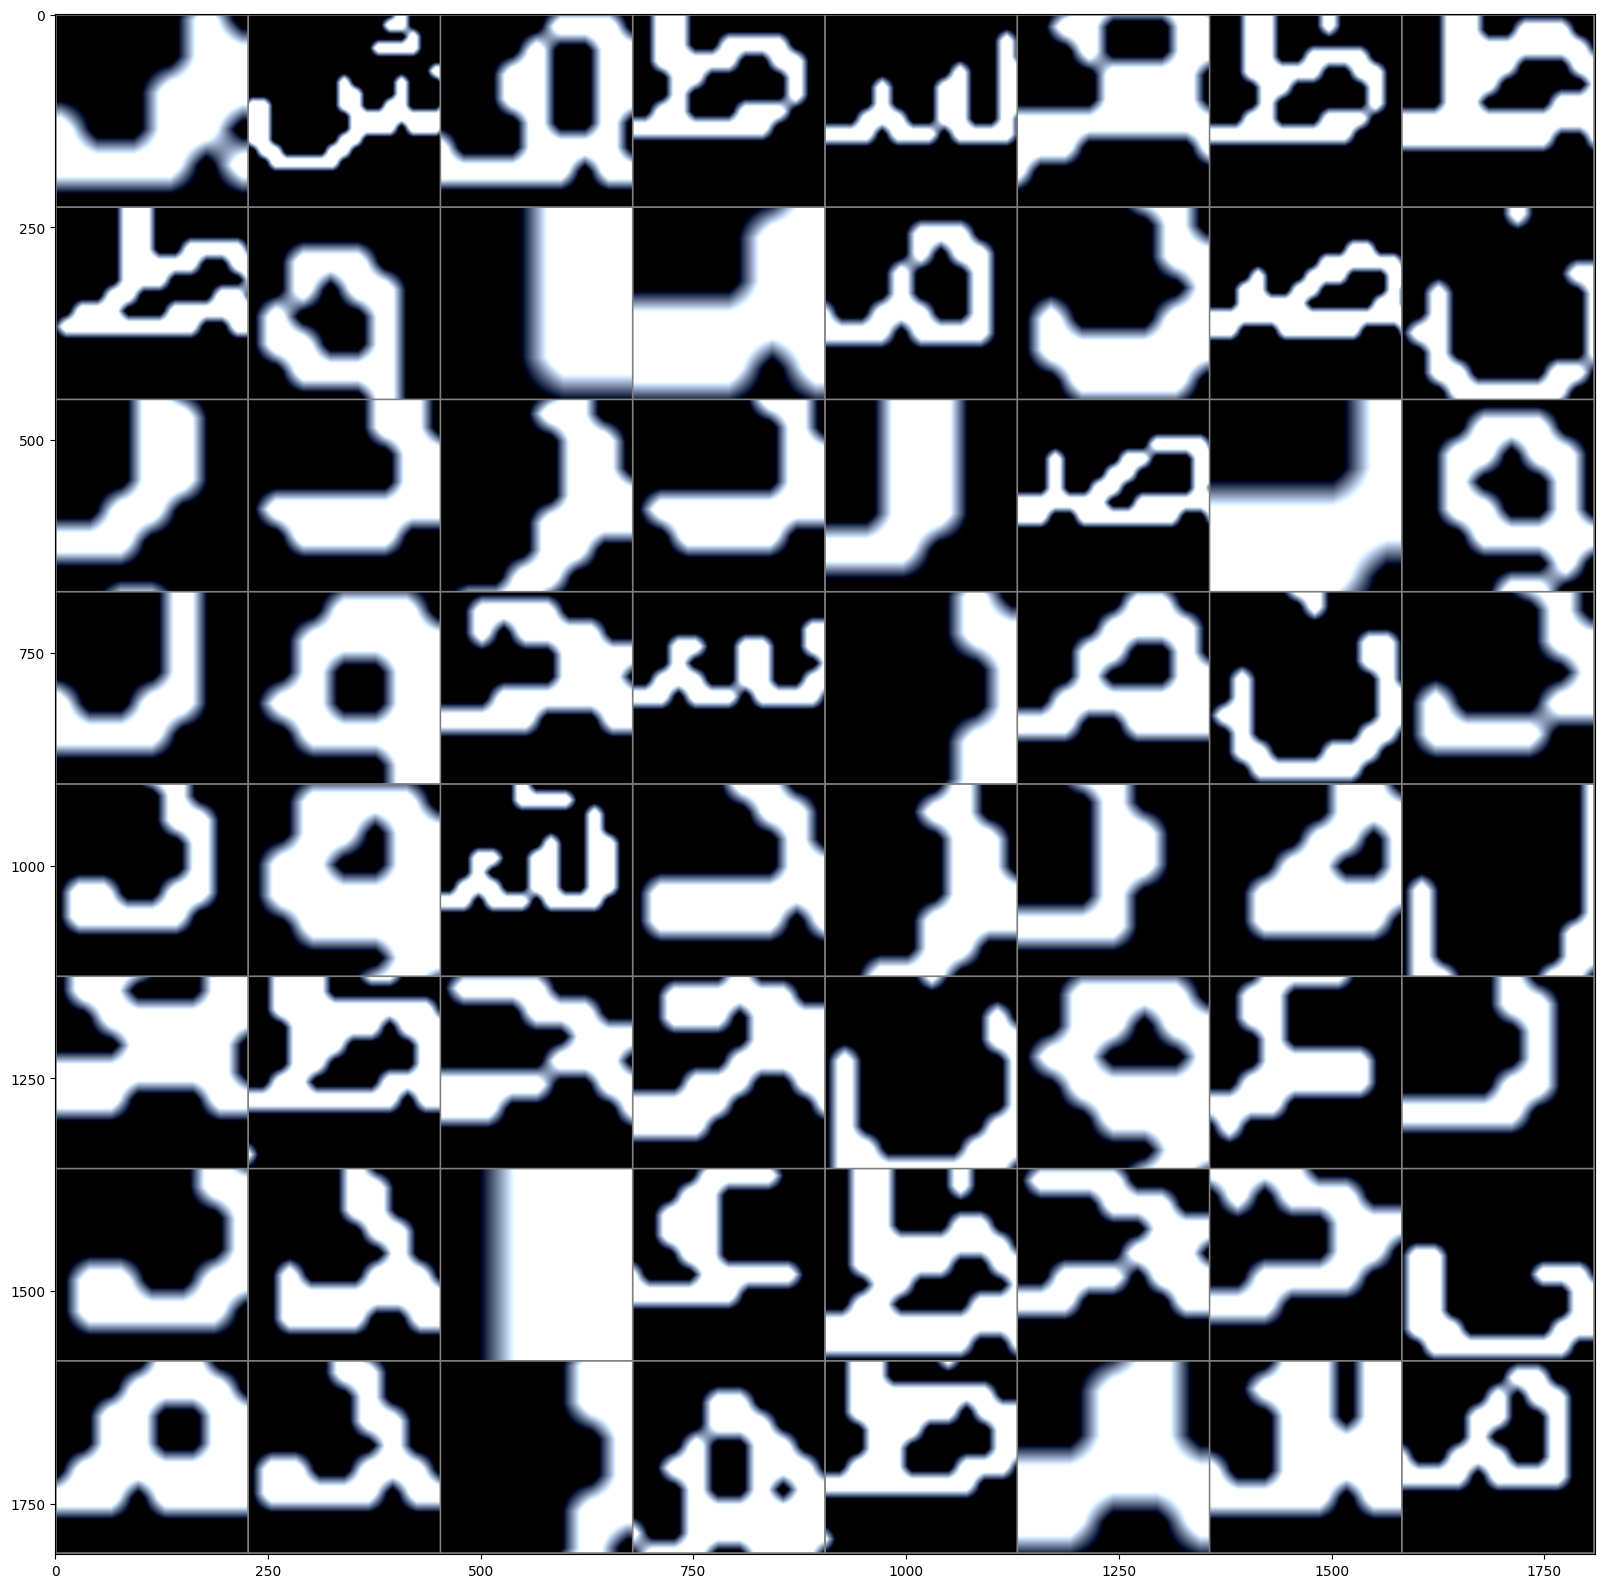

In [12]:
examples = iter(train_loader)
images,labels = next(examples)
imshow(torchvision.utils.make_grid(images))

In [13]:
# class mymodel(nn.Module):
#     def __init__(self, num_classes=29):
#         super(mymodel, self).__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.Conv2d(64, 192, kernel_size=5, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2)
#         )
#         self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
#         self.classifier = nn.Sequential(
#             nn.Dropout(),
#             nn.Linear(256 * 6 * 6, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Linear(4096, num_classes)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.classifier(x)
#         return x





In [14]:
# class Model(nn.Module):
#     def __init__(self, num_classes=29, dropout_rate=0.5, l2_reg=1e-4):
#         super(Model, self).__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.Conv2d(64, 128, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#         )
#         self.avgpool = nn.AdaptiveAvgPool2d((4, 4))  # Reduced size for simplicity
#         self.classifier = nn.Sequential(
#             nn.Linear(128 * 4 * 4, 512),
#             nn.ReLU(inplace=True),
#             nn.Dropout(dropout_rate),
#             nn.Linear(512, num_classes)
#         )

#         # Add L2 regularization to the linear layers
#         self.regularization = nn.ModuleList([
#             nn.Linear(128 * 4 * 4, 512),
#             nn.Linear(512, num_classes)
#         ])

#         self.l2_reg = l2_reg

#     def forward(self, x):
#         x = self.features(x)
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)

#         # Apply L2 regularization to the linear layers
#         l2_loss = 0.0
#         for layer in self.regularization:
#             l2_loss += self.l2_reg * torch.norm(layer.weight)

#         x = self.classifier(x)
#         return x - l2_loss  # Subtract regularization term from output during training

In [34]:
class enhanced_model(nn.Module):
    def __init__(self, num_classes=29):
        super(enhanced_model, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),  # Add dropout
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Add dropout
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )
        self.batch_norm = nn.BatchNorm2d(256)  # Batch Normalization

    def forward(self, x):
        x = self.features(x)
        x = self.batch_norm(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [35]:


model = enhanced_model().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
# scheduler = MultiStepLR(optimizer, milestones=[150, 225], gamma=0.1)

In [36]:
# IMAGE_SIZE=(3,)+IMAGE_SIZE
# print(summary(model,IMAGE_SIZE))

In [37]:
def test(model,testloader):
    with torch.no_grad():
        n_correct=0
        n_samples=0
        y_pred=[]
        y_actual=[]
        for i,(images,labels) in enumerate(testloader):
            images=images.to(device)
            labels=labels.to(device)

            outputs=model(images)

            y_actual+=list(np.array(labels.detach().to('cpu')).flatten())
        # value ,index
            _,predictes=torch.max(outputs,1)
            y_pred+=list(np.array(predictes.detach().to('cpu')).flatten())
        # number of samples in current batch
            n_samples+=labels.shape[0]

            n_correct+= (predictes==labels).sum().item()

        y_actual=np.array(y_actual).flatten()
        y_pred=np.array(y_pred).flatten()
        print(np.unique(y_pred))
        acc = classification_report(y_actual,y_pred,target_names=dataset.classes)
        print(f"{acc}")

def train(model,train_loader,criterion,optimizer,val_loader,epochs=25):
    train_losses = []
    val_losses = []
    train_auc = []
    val_auc = []
    train_auc_epoch = []
    val_auc_epoch = []
    best_acc = 0.0
    min_loss = np.Inf

    since = time.time()
    y_actual=[]
    y_pred=[]
    for e in range(epochs):
        y_actual=[]
        y_pred=[]
        train_loss = 0.0
        val_loss = 0.0

        # Train the model
        model.train()
        for i, (images, labels) in enumerate(tqdm(train_loader, total=int(len(train_loader)))):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss and accuracy
            train_loss += loss.item()

            _,predictes=torch.max(outputs,1)
            y_actual += list(labels.data.cpu().numpy().flatten())
            y_pred += list(predictes.detach().cpu().numpy().flatten())
        train_auc.append(accuracy_score(y_actual, y_pred))

        # Evaluate the model
        model.eval()
        for i, (images, labels) in enumerate(tqdm(val_loader, total=int(len(val_loader)))):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Loss and accuracy
            val_loss += loss.item()
            _,predictes=torch.max(outputs,1)
            y_actual += list(labels.data.cpu().numpy().flatten())
            y_pred += list(predictes.detach().cpu().numpy().flatten())

        val_auc.append(accuracy_score(y_actual, y_pred))

        # Average losses and accuracies
        train_loss = train_loss/len(train_loader)
        val_loss = val_loss/len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        training_auc = train_auc[-1]
        validation_auc = val_auc[-1]
        train_auc_epoch.append(training_auc)
        val_auc_epoch.append(validation_auc)

        # Updating best validation accuracy
        if best_acc < validation_auc:
            best_acc = validation_auc

        # Saving best model
        if min_loss >= val_loss:
            torch.save(model.state_dict(), 'best_model.pt')
            min_loss = val_loss

        print('EPOCH {}/{} Train loss: {:.6f},Validation loss: {:.6f}, Train AUC: {:.4f}  Validation AUC: {:.4f}\n  '.format(e+1, epochs,train_loss,val_loss, training_auc,validation_auc))
        print('-' * 10)
    time_elapsed = time.time() - since
    print('Training completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best validation accuracy: {:4f}'.format(best_acc))
    return train_losses,val_losses,train_auc ,val_auc,train_auc_epoch,val_auc_epoch

In [ ]:
train_losses,val_losses,train_auc ,val_auc,train_auc_epoch,val_auc_epoch=train(model,train_loader,criterion,optimizer,val_loader,epochs)

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 1/50 Train loss: 0.733771,Validation loss: 0.496397, Train AUC: 0.6943  Validation AUC: 0.7023
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 2/50 Train loss: 0.434820,Validation loss: 0.416990, Train AUC: 0.7818  Validation AUC: 0.7827
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 3/50 Train loss: 0.395720,Validation loss: 0.382881, Train AUC: 0.7955  Validation AUC: 0.7954
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 4/50 Train loss: 0.370746,Validation loss: 0.366742, Train AUC: 0.8072  Validation AUC: 0.8069
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 5/50 Train loss: 0.360141,Validation loss: 0.353174, Train AUC: 0.8099  Validation AUC: 0.8103
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 6/50 Train loss: 0.351633,Validation loss: 0.348572, Train AUC: 0.8147  Validation AUC: 0.8144
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 7/50 Train loss: 0.342671,Validation loss: 0.357662, Train AUC: 0.8181  Validation AUC: 0.8178
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 8/50 Train loss: 0.337555,Validation loss: 0.348288, Train AUC: 0.8211  Validation AUC: 0.8207
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 9/50 Train loss: 0.333266,Validation loss: 0.344020, Train AUC: 0.8239  Validation AUC: 0.8236
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 10/50 Train loss: 0.327980,Validation loss: 0.339899, Train AUC: 0.8236  Validation AUC: 0.8231
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 11/50 Train loss: 0.324586,Validation loss: 0.342248, Train AUC: 0.8268  Validation AUC: 0.8264
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 12/50 Train loss: 0.322341,Validation loss: 0.338745, Train AUC: 0.8292  Validation AUC: 0.8281
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 13/50 Train loss: 0.319357,Validation loss: 0.345188, Train AUC: 0.8309  Validation AUC: 0.8298
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 14/50 Train loss: 0.319016,Validation loss: 0.341735, Train AUC: 0.8321  Validation AUC: 0.8308
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 15/50 Train loss: 0.312978,Validation loss: 0.343569, Train AUC: 0.8331  Validation AUC: 0.8315
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 16/50 Train loss: 0.311961,Validation loss: 0.350837, Train AUC: 0.8340  Validation AUC: 0.8325
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 17/50 Train loss: 0.309215,Validation loss: 0.335906, Train AUC: 0.8354  Validation AUC: 0.8344
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 18/50 Train loss: 0.308005,Validation loss: 0.339531, Train AUC: 0.8365  Validation AUC: 0.8352
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 19/50 Train loss: 0.306666,Validation loss: 0.338695, Train AUC: 0.8383  Validation AUC: 0.8366
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 20/50 Train loss: 0.304517,Validation loss: 0.335706, Train AUC: 0.8391  Validation AUC: 0.8376
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 21/50 Train loss: 0.302711,Validation loss: 0.345392, Train AUC: 0.8407  Validation AUC: 0.8382
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 22/50 Train loss: 0.302769,Validation loss: 0.338607, Train AUC: 0.8404  Validation AUC: 0.8386
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 23/50 Train loss: 0.300693,Validation loss: 0.339332, Train AUC: 0.8411  Validation AUC: 0.8394
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 24/50 Train loss: 0.299354,Validation loss: 0.350046, Train AUC: 0.8426  Validation AUC: 0.8400
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 25/50 Train loss: 0.301512,Validation loss: 0.345095, Train AUC: 0.8419  Validation AUC: 0.8402
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 26/50 Train loss: 0.297671,Validation loss: 0.341439, Train AUC: 0.8440  Validation AUC: 0.8414
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 27/50 Train loss: 0.294903,Validation loss: 0.339048, Train AUC: 0.8460  Validation AUC: 0.8439
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 29/50 Train loss: 0.295309,Validation loss: 0.352829, Train AUC: 0.8458  Validation AUC: 0.8438
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 30/50 Train loss: 0.292321,Validation loss: 0.339514, Train AUC: 0.8476  Validation AUC: 0.8451
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 31/50 Train loss: 0.291126,Validation loss: 0.341105, Train AUC: 0.8471  Validation AUC: 0.8444
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 32/50 Train loss: 0.290331,Validation loss: 0.344773, Train AUC: 0.8484  Validation AUC: 0.8453
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 33/50 Train loss: 0.288807,Validation loss: 0.338607, Train AUC: 0.8487  Validation AUC: 0.8460
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 34/50 Train loss: 0.286938,Validation loss: 0.349986, Train AUC: 0.8494  Validation AUC: 0.8460
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

EPOCH 35/50 Train loss: 0.287397,Validation loss: 0.342073, Train AUC: 0.8512  Validation AUC: 0.8480
  
----------


  0%|          | 0/900 [00:00<?, ?it/s]

In [19]:
# model.load_state_dict(torch.load('../working/best_model.pt'))
test(model,test_loader)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
              precision    recall  f1-score   support

           ا       0.96      1.00      0.98       226
           ب       0.88      0.72      0.80       265
           ت       0.62      0.66      0.64       257
           ث       0.66      0.61      0.63       243
           ج       0.96      0.95      0.96       257
           ح       0.61      0.74      0.67       258
           خ       0.69      0.55      0.61       260
           د       0.52      1.00      0.68       241
           ذ       0.80      0.05      0.10       235
           ر       0.66      0.49      0.56       243
           ز       0.58      0.73      0.65       241
           س       1.00      1.00      1.00       253
           ش       1.00      0.99      1.00       260
           ص       1.00      1.00      1.00       250
           ض       1.00      0.99      0.99       250
           ط       0.91      0.98      0.94  

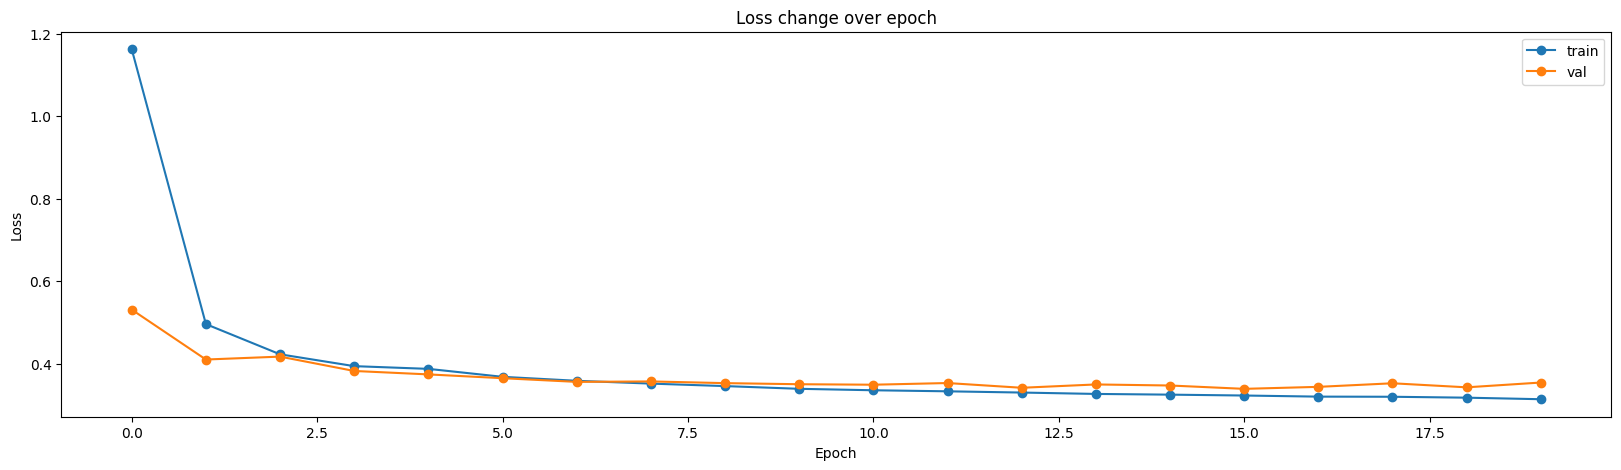

In [20]:
plt.figure(figsize=(20,5))
plt.plot(train_losses, '-o', label="train")
plt.plot(val_losses, '-o', label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss change over epoch")
plt.legend()

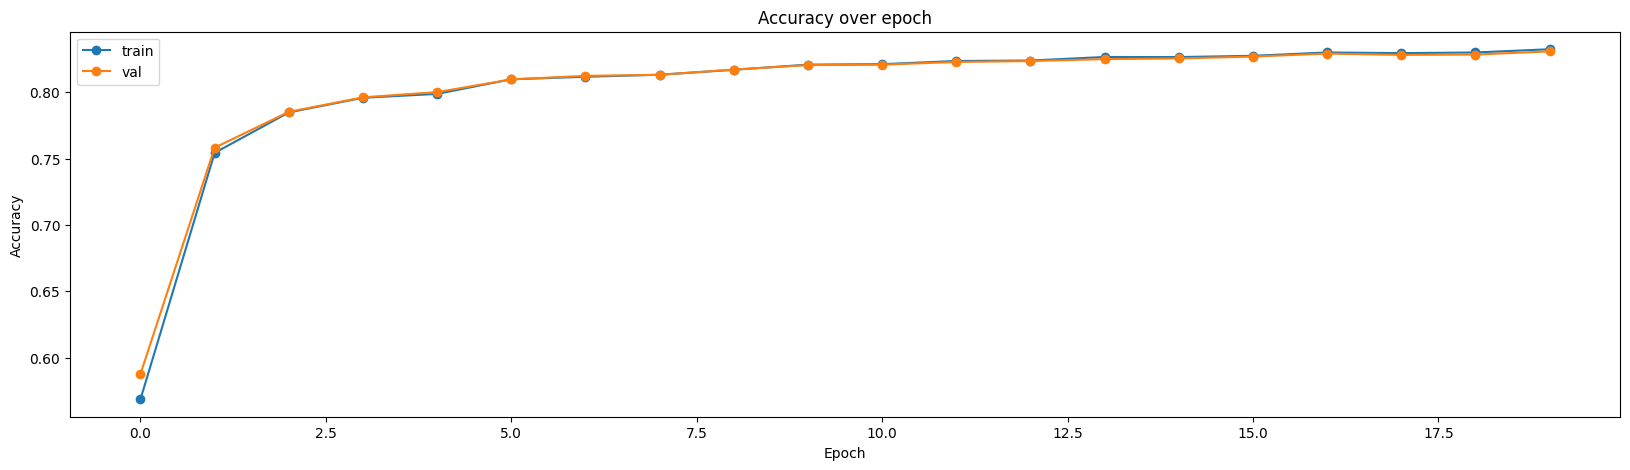

In [21]:
plt.figure(figsize=(20,5))
plt.plot(train_auc_epoch, '-o', label="train")
plt.plot(val_auc_epoch, '-o', label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over epoch")
plt.legend()

In [22]:
torch.save(model,'best.pt')